## Import Libraries & Load Data

In [5]:
# ev_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("electric_vehicles_dataset.csv")

# Display first rows
print(df.head())
print(df.info())
print(df.describe())

   Vehicle_ID Manufacturer                 Model  Year  \
0           1        Acura  ZDX (with GM Ultium)  2015   
1           2  Lamborghini       Revuelto (PHEV)  2025   
2           3          NIO                   ET7  2020   
3           4         Audi                e-tron  2025   
4           5        Acura  ZDX (with GM Ultium)  2023   

             Battery_Type  Battery_Capacity_kWh  Range_km  \
0        Lithium-titanate                  55.8       214   
1        Lithium-titanate                  90.8       212   
2             Calcium-ion                  64.7       235   
3  Lithium-iron phosphate                 120.5       140   
4        Lithium-titanate                  51.8       336   

                   Charging_Type  Charge_Time_hr  Price_USD          Color  \
0                        CHAdeMO             9.0  111203.94    Matte White   
1          Vehicle-to-Home (V2H)             7.3  127131.65          White   
2               Level 2 Charging             8.9  

## Data Cleaning

In [6]:
# Handle missing values
df = df.dropna(subset=["Safety_Rating", "CO2_Emissions_g_per_km"])

# Convert Year to integer
df["Year"] = df["Year"].astype(int)

# Check duplicates
df = df.drop_duplicates()

# Ensure numeric columns are proper dtype
numeric_cols = ["Battery_Capacity_kWh","Range_km","Charge_Time_hr","Price_USD",
                "Autonomous_Level","CO2_Emissions_g_per_km","Safety_Rating","Units_Sold_2024"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

## Analysis & Visualizations
### Top Manufacturers by Sales

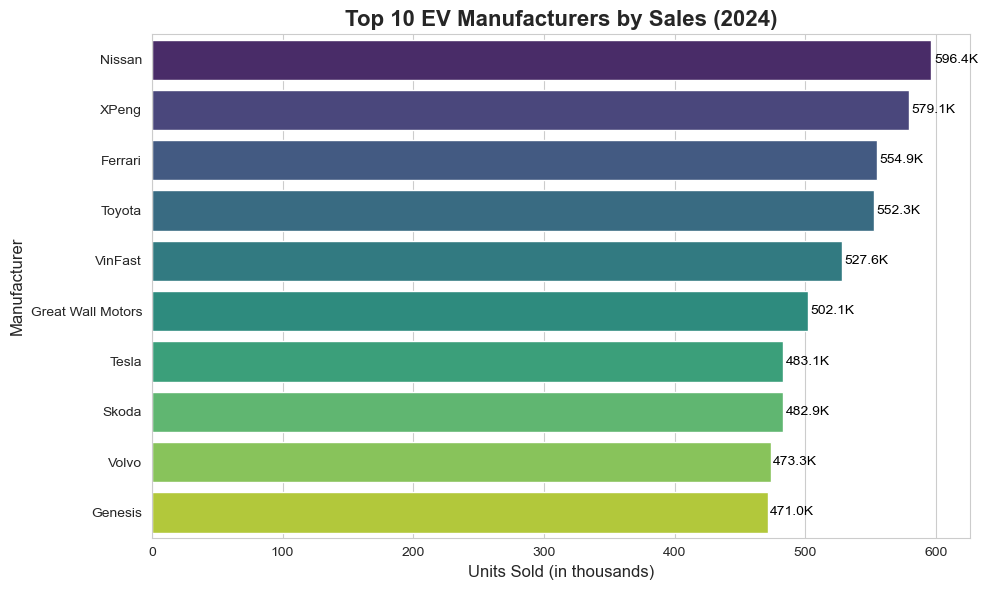

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data
top_manu = (
    df.groupby("Manufacturer")["Units_Sold_2024"]
    .sum()
    .sort_values(ascending=False)
    .head(10) / 1000  # Convert to thousands
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_manu.values, 
    y=top_manu.index, 
    hue=top_manu.index, 
    palette="viridis", 
    legend=False
)

# Titles and labels
plt.title("Top 10 EV Manufacturers by Sales (2024)", fontsize=16, weight="bold")
plt.xlabel("Units Sold (in thousands)", fontsize=12)
plt.ylabel("Manufacturer", fontsize=12)

# Annotate each bar
for i, v in enumerate(top_manu.values):
    ax.text(v + 2, i, f"{v:.1f}K", color="black", va="center", fontsize=10)

plt.tight_layout()
plt.show()



### Battery Capacity vs Range

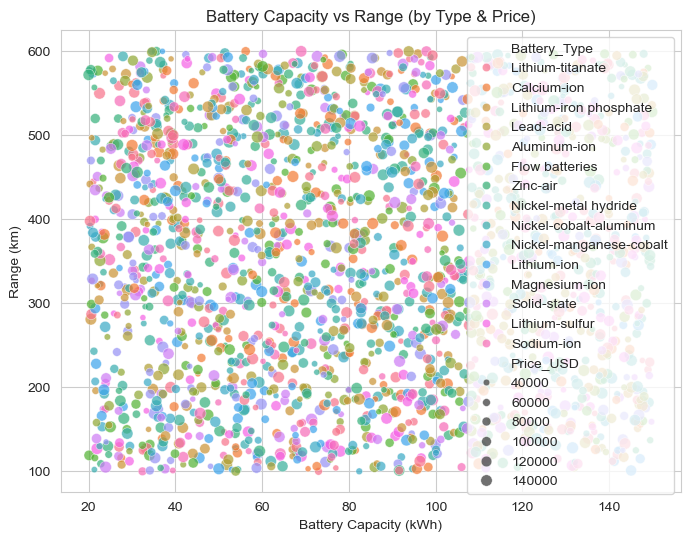

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Battery_Capacity_kWh", y="Range_km", hue="Battery_Type", size="Price_USD", data=df, alpha=0.7)
plt.title("Battery Capacity vs Range (by Type & Price)")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.show()


### Price vs Range Trade-offs

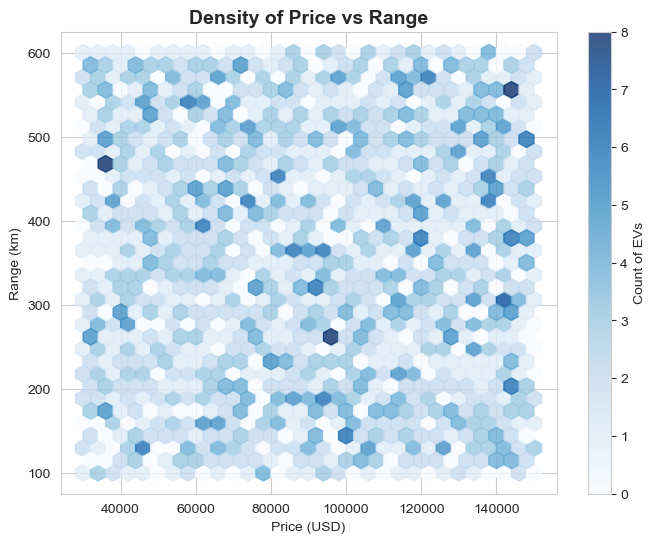

In [14]:
plt.figure(figsize=(8,6))
plt.hexbin(df["Price_USD"], df["Range_km"], gridsize=30, cmap="Blues", alpha=0.8)
plt.colorbar(label="Count of EVs")
plt.title("Density of Price vs Range", fontsize=14, weight="bold")
plt.xlabel("Price (USD)")
plt.ylabel("Range (km)")
plt.show()

### Sales by Country

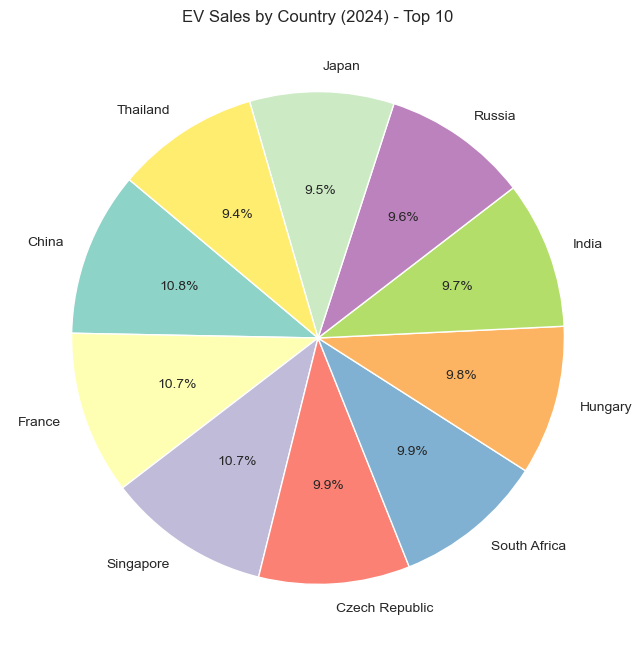

In [17]:
plt.figure(figsize=(8,8))
country_sales = df.groupby("Country_of_Manufacture")["Units_Sold_2024"].sum().sort_values(ascending=False).head(10)
plt.pie(country_sales.values, labels=country_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("EV Sales by Country (2024) - Top 10")
plt.show()

### Impact of Autonomous Level & Safety Rating on Sales

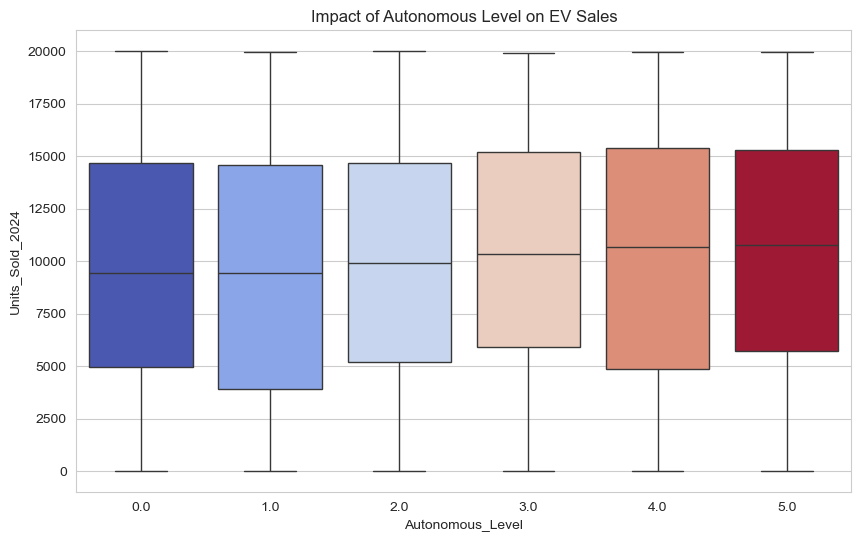

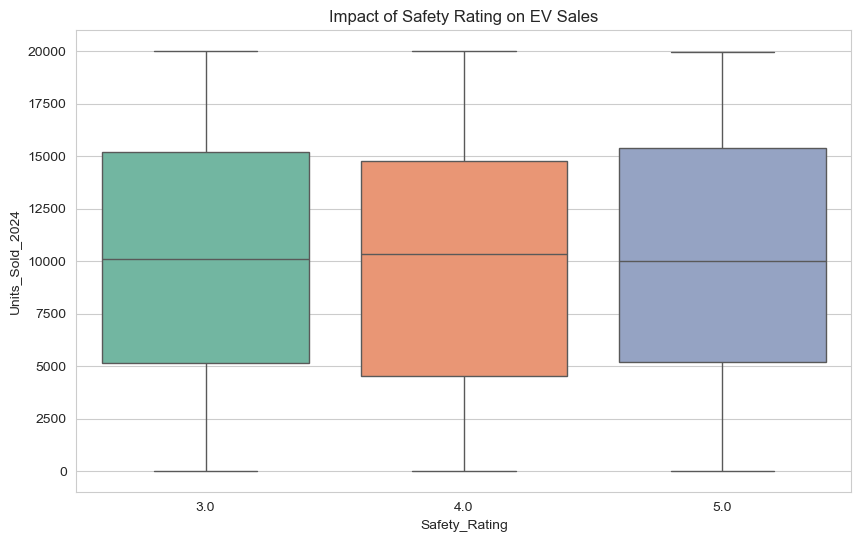

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Autonomous_Level", y="Units_Sold_2024", data=df, hue="Autonomous_Level", palette="coolwarm", legend=False)
plt.title("Impact of Autonomous Level on EV Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Safety_Rating", y="Units_Sold_2024", data=df, hue="Safety_Rating", palette="Set2", legend=False)
plt.title("Impact of Safety Rating on EV Sales")
plt.show()



In [29]:
import os

# Create folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Save cleaned data
df.to_csv("outputs/cleaned_ev_data.csv", index=False)

# Save summary
summary = df.describe()
summary.to_csv("outputs/summary.csv")